**Prepare your colab PC by using your username and key from kaggle**

In [2]:
import os
os.environ["KAGGLE_USERNAME"] = "abdelrahmanabdelhakm"
os.environ["KAGGLE_KEY"] = "6326562f87927a055cbf9dd460a6a925"

**this is the tool used from kaggle to able you downloading your data**

In [3]:
! kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 38.6MB/s]


In [4]:
! ls

netflix-shows.zip  sample_data


In [5]:
! unzip netflix-shows.zip

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2707,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...","Hong Kong, China","August 1, 2018",1997,TV-MA,89 min,"Action & Adventure, International Movies",A pugilist from Shantung struggles to rise to ...
246,s247,Movie,A Very Country Christmas,Justin G. Dyck,"Bea Santos, Greyston Holt, Greg Vaughan, Deana...","United States, Canada","November 15, 2020",2017,TV-G,84 min,"Music & Musicals, Romantic Movies",When an unfulfilled country music star hides o...
3069,s3070,TV Show,Islands of the Future,NaN,NaN,United Kingdom,"March 1, 2017",2014,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Amid rising oil and gas prices and dwindling r...
7592,s7593,Movie,Whisky,"Pablo Stoll, Juan Pablo Rebella","Andrés Pazos, Mirella Pascual, Jorge Bolani, J...","Uruguay, Argentina, Germany, Spain","January 22, 2020",2004,TV-MA,98 min,"Comedies, Dramas, International Movies","To impress family, a factory owner pretends to..."
4181,s4182,TV Show,Monkey Twins,NaN,"Phakin Khamwilaisak, Sumret Muengput, Alisa Ku...",Thailand,"September 2, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Inspired by Khon dance drama and Thai martial ...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Drop columns that may cause any misleading or which are not important (meaningless)**

In [11]:
df.drop(labels='show_id', axis=1, inplace=True)

In [12]:
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
713,Movie,Banana Island Ghost,BB Sasore,"Chigul, Patrick Diabuah, Adetomiwa Edun, Uche ...",Nigeria,"December 6, 2019",2017,TV-14,108 min,"Comedies, International Movies","Searching for a soul mate, a ghost negotiates ..."
3688,Movie,Lo and Behold: Reveries of the Connected World,Werner Herzog,Werner Herzog,United States,"December 23, 2016",2016,PG-13,98 min,Documentaries,Filmmaker Werner Herzog presents a history of ...
4858,TV Show,PILI Fantasy: War of Dragons,NaN,"Wang Hsi-hua, Lai Wei, Zhang Yu-quan, Chen Yu-...",NaN,"July 12, 2019",2019,TV-14,1 Season,"International TV Shows, TV Action & Adventure,...","As turmoil looms in the Martial World, and the..."
4297,TV Show,Mutant Busters,NaN,"Dermot Arrigan, James Giblin, Noah Levin, Moll...",Spain,"June 1, 2017",2017,TV-PG,2 Seasons,"Kids' TV, TV Comedies",After a natural disaster known as the Big Fart...
5290,Movie,Roxanne Roxanne,Michael Larnell,"Chanté Adams, Mahershala Ali, Nia Long, Elvis ...",United States,"March 23, 2018",2018,TV-MA,100 min,Dramas,She grew up in a tough New York neighborhood i...


In [13]:
df.shape

(7787, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


**Convert `date_added` into datetime**

In [15]:
df.date_added = pd.to_datetime(df.date_added)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          7787 non-null   object        
 1   title         7787 non-null   object        
 2   director      5398 non-null   object        
 3   cast          7069 non-null   object        
 4   country       7280 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7787 non-null   int64         
 7   rating        7780 non-null   object        
 8   duration      7787 non-null   object        
 9   listed_in     7787 non-null   object        
 10  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 669.3+ KB


**Now we can extract the year from `date_added` column** 

In [17]:
df["year_added"] = df["date_added"].dt.year

In [18]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [19]:
df.drop(labels='date_added', axis=1, inplace=True)

In [20]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'year_added'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          7787 non-null   object 
 1   title         7787 non-null   object 
 2   director      5398 non-null   object 
 3   cast          7069 non-null   object 
 4   country       7280 non-null   object 
 5   release_year  7787 non-null   int64  
 6   rating        7780 non-null   object 
 7   duration      7787 non-null   object 
 8   listed_in     7787 non-null   object 
 9   description   7787 non-null   object 
 10  year_added    7777 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 669.3+ KB


**Convert `year_added` from float to int**

In [22]:
df.shape

(7787, 11)

**When you wanna convert data type of column's value it must not has any NaN values, So we will drop any NaN value in `year_added` column**

In [23]:
df = df[df.year_added.notna()]
df.shape

(7777, 11)

In [24]:
df['year_added'] = df['year_added'].apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7777 non-null   object
 1   title         7777 non-null   object
 2   director      5398 non-null   object
 3   cast          7059 non-null   object
 4   country       7271 non-null   object
 5   release_year  7777 non-null   int64 
 6   rating        7770 non-null   object
 7   duration      7777 non-null   object
 8   listed_in     7777 non-null   object
 9   description   7777 non-null   object
 10  year_added    7777 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 729.1+ KB


In [25]:
df.sample(10)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
4086,TV Show,Mighty Little Bheem: Kite Festival,NaN,"Sumruddhi Shukla, Aranya Kaur, Nishka Raheja",India,2021,TV-Y,1 Season,"Kids' TV, TV Comedies","With winter behind them, Bheem and his townspe...",2021
5399,Movie,Sat Shri Akaal England,Vikram Pradhan,"Ammy Virk, Monica Gill, Karamjit Anmol, Sardar...",India,2017,TV-14,127 min,"Comedies, Dramas, International Movies",After several failed attempts to obtain a visa...,2018
5093,Movie,Ramji Londonwaley,Sanjay Dayma,"Madhavan, Samita Bangargi, Harsh Chhaya, Rajen...",India,2005,TV-14,154 min,"Comedies, Dramas, International Movies",A small-town cook moves to London to earn a li...,2019
4751,Movie,Pandigai,Feroz,"Kreshna, Anandhi, Saravanan, Madhusudhanan, Bl...",India,2017,TV-MA,125 min,"Action & Adventure, Dramas, International Movies",Looking for a way out of his impoverished life...,2019
2837,Movie,How It Ends,David M. Rosenthal,"Theo James, Forest Whitaker, Kat Graham, Nicol...",United States,2018,TV-MA,113 min,"Action & Adventure, Sci-Fi & Fantasy",When a mysterious disaster turns the country i...,2018
239,TV Show,A Thousand Goodnights,NaN,"Cindy Lien, Nicholas Teo, Yao Ai-ning, Li Chun...",Taiwan,2019,TV-14,1 Season,"International TV Shows, TV Dramas",To carry out her dad's wish and discover her r...,2019
5847,Movie,Strike a Pose,"Ester Gould, Reijer Zwaan",NaN,"Netherlands, Belgium",2016,TV-MA,85 min,"Documentaries, International Movies, LGBTQ Movies","A quarter-century later, this documentary relo...",2017
7449,Movie,W.E.,Madonna,"Abbie Cornish, Andrea Riseborough, James D'Arc...",United Kingdom,2011,R,119 min,"Dramas, Romantic Movies",This glossy ensemble drama juxtaposes the live...,2020
4096,Movie,Milada,David Mrnka,"Ayelet Zurer, Robert Gant, Vica Kerekes, Aňa G...","Czech Republic, United States",2017,TV-14,124 min,"Dramas, International Movies",Politician and human rights campaigner Milada ...,2018
7433,Movie,Virunga,Orlando von Einsiedel,NaN,"United Kingdom,",2014,TV-MA,100 min,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...,2014


**We can seperate our data into two data set (Movie) and (TV Show) to make our
exploring easier**

In [29]:
type_counts = df.type.value_counts()
type_counts

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [30]:
df_movies = df.query('type == "Movie"')

In [31]:
df_shows = df.query('type == "TV Show"')

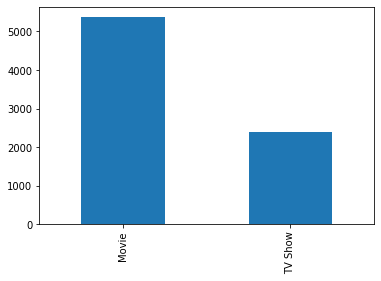

In [32]:
type_counts.plot(kind='bar')

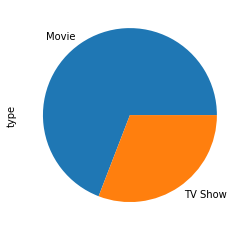

In [34]:
type_counts.plot.pie(figsize=(4,4))

In [33]:
df_movies.country.value_counts()

United States                     1850
India                              852
United Kingdom                     193
Canada                             118
Spain                               89
                                  ... 
Peru, Germany, Norway                1
Italy, Belgium                       1
Germany, United States, France       1
Germany, Sri Lanka                   1
United Kingdom, Israel, Russia       1
Name: country, Length: 590, dtype: int64

In [35]:
df_shows.country.value_counts()

United States                              699
United Kingdom                             203
Japan                                      156
South Korea                                147
India                                       71
                                          ... 
Belgium, Netherlands                         1
Spain, United Kingdom                        1
Croatia                                      1
United Kingdom, Singapore                    1
United States, Hungary, Ireland, Canada      1
Name: country, Length: 183, dtype: int64

In [38]:
movie_directors = df_movies.director.value_counts()

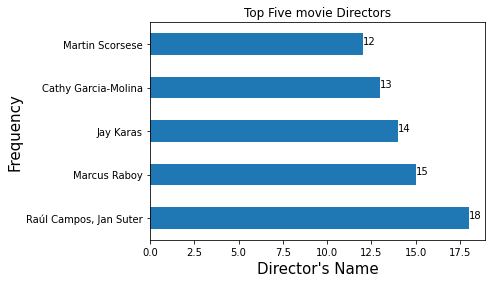

In [47]:
movie_directors.head().plot(kind='barh')
plt.xlabel("Director's Name", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top Five movie Directors")
for index, value in enumerate(movie_directors.head()):
  plt.text(value, index, str(value))

In [39]:
show_directors = df_shows.director.value_counts()

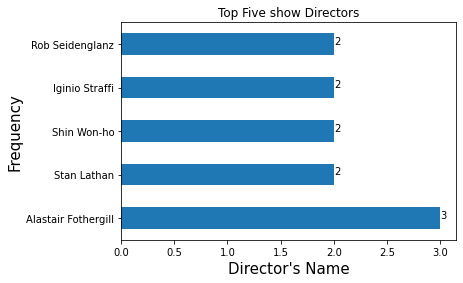

In [46]:
show_directors.head().plot(kind='barh')
plt.xlabel("Director's Name", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top Five show Directors")
for index, value in enumerate(show_directors.head()):
  plt.text(value, index, str(value))

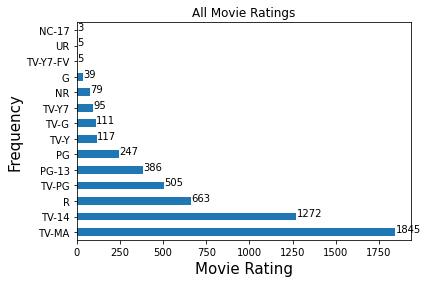

In [49]:
movie_ratings_count = df_movies.rating.value_counts()

movie_ratings_count.plot(kind='barh')
plt.xlabel("Movie Rating", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("All Movie Ratings")
for index, value in enumerate(movie_ratings_count):
  plt.text(value, index, str(value))

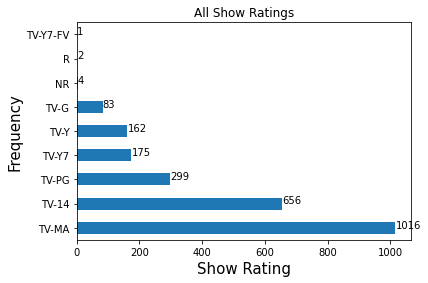

In [50]:
show_ratings_count = df_shows.rating.value_counts()

show_ratings_count.plot(kind='barh')
plt.xlabel("Show Rating", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("All Show Ratings")
for index, value in enumerate(show_ratings_count):
  plt.text(value, index, str(value))